<h2>Importando as bibliotecas
   

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, model_selection

from imblearn.over_sampling import SMOTE

<h2>Importando os dados e criando o dataframe


In [2]:
df = pd.read_csv("E:/Mestrado Matérias/2 MÓDULO/Machine Learning/Trabalho/heart_failure_clinical_records_dataset.csv")

df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<h2>Verificando a ausência de dados

In [3]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<h3>Conjunto de dados desbalanceados
    

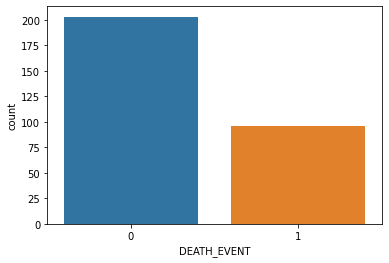

In [5]:
sns.countplot(x="DEATH_EVENT", data=df)
plt.show()

In [6]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<h3>Reestruturação dos Dados

<h4>Uma abordagem para lidar com dados desbalanceados é sobreamostrar a classe minoritária, igualando assim a proporção das categorias.Existem diversas estratégias para a criação de novas observações da classe minoritária de forma sintetica.

<h3>SMOTE - Synthetic Minority Oversampling Technique

<h4>O SMOTE se trata de uma técnica mais sofisticada, proposta com o objetivo de solucionar o problema do modelo se tornar muito bom em identificar casos específicos da classe minoritária, e não a categoria como um todo.
    A técnica consiste em selecionar aleatoriamente um exemplo da classe desbalanceada.Em seguida, k dos vizinhos mais próximos para esse exemplo são encontrados. Um vizinho é escolhido aleatoriamente e então um exemplo sintético é criado em um ponto aleatório entre os dois exemplos no espaço.  
    

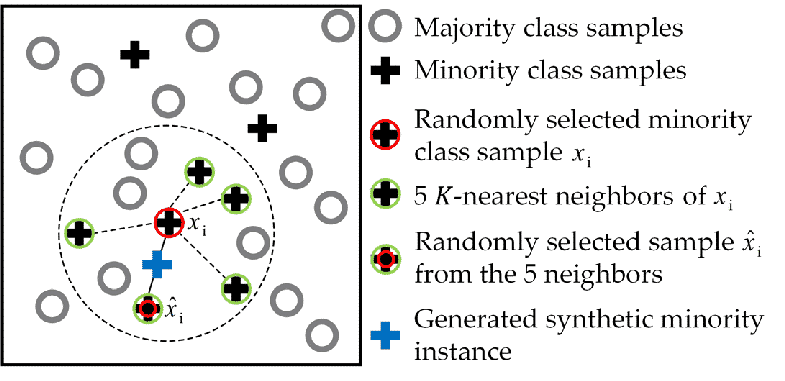

In [8]:
smote = SMOTE(random_state=10)
X_smote,y_smote = smote.fit_resample(df.iloc[:,:-1], df.DEATH_EVENT)
df = pd.concat([X_smote,y_smote], axis=1)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


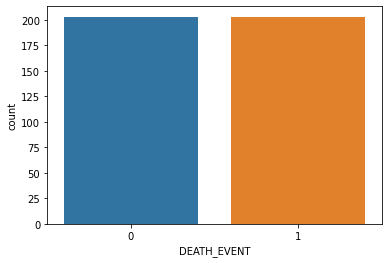

In [9]:
sns.countplot(x="DEATH_EVENT", data=df)
plt.show()

In [10]:
df.DEATH_EVENT.value_counts()

1    203
0    203
Name: DEATH_EVENT, dtype: int64

<h2>Verificando a presença de Outliers

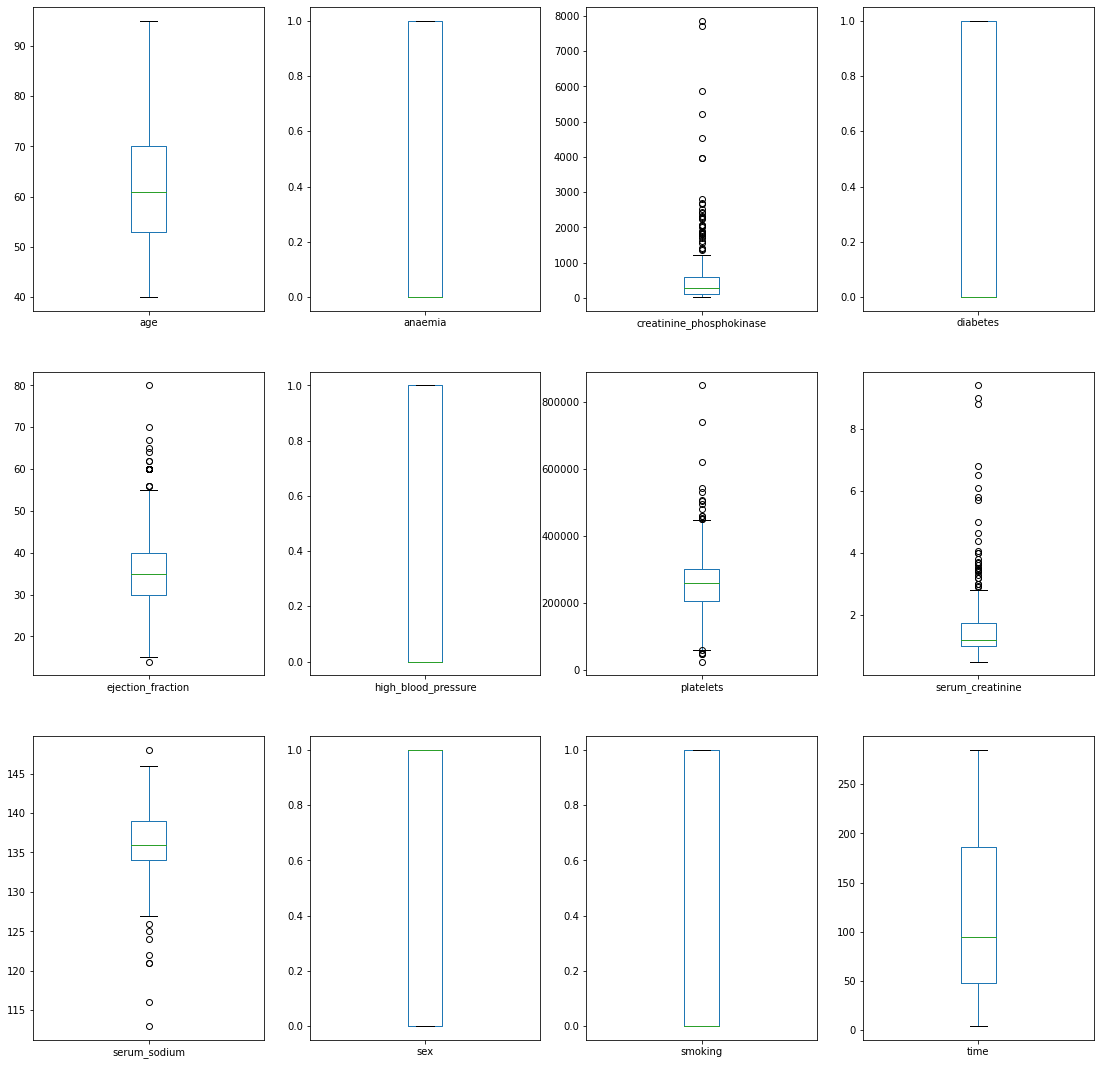

In [11]:
df.iloc[:,:-1].plot(kind='box', subplots=True, layout=(3,4), figsize=(19,19))
plt.show()

<h2>Tratando nossos Outliers

In [12]:
for i in df.iloc[:,:-1]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    limite_superior= Q3+(1.5*IQR)
    limite_inferior = Q1-(1.5*IQR)
    
    df = df[(df[i]>=limite_inferior) & (df[i]<= limite_superior)]

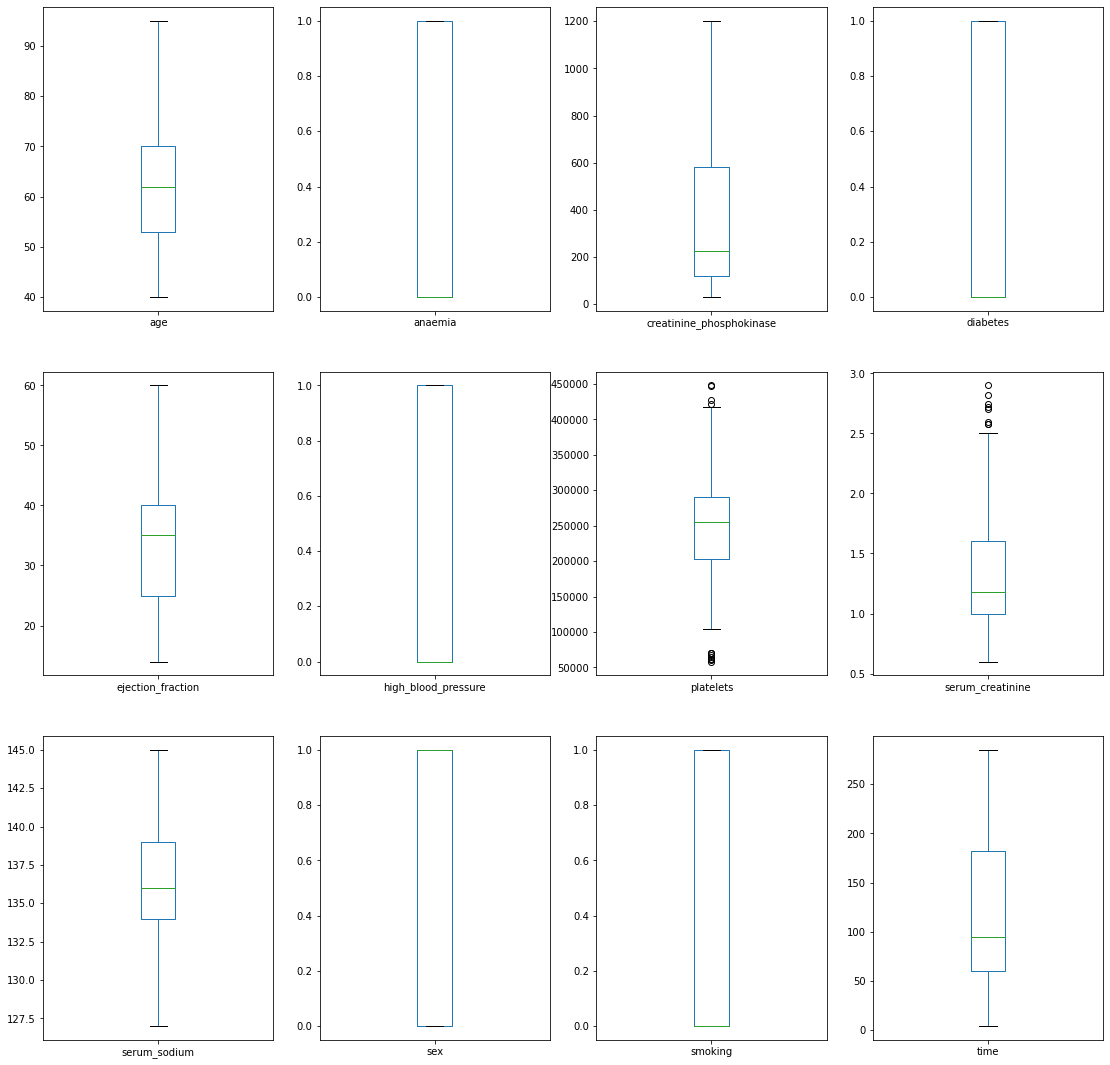

In [13]:
df.iloc[:,:-1].plot(kind='box', subplots=True, layout=(3,4), figsize=(19,19))
plt.show()

<h2>Correlação

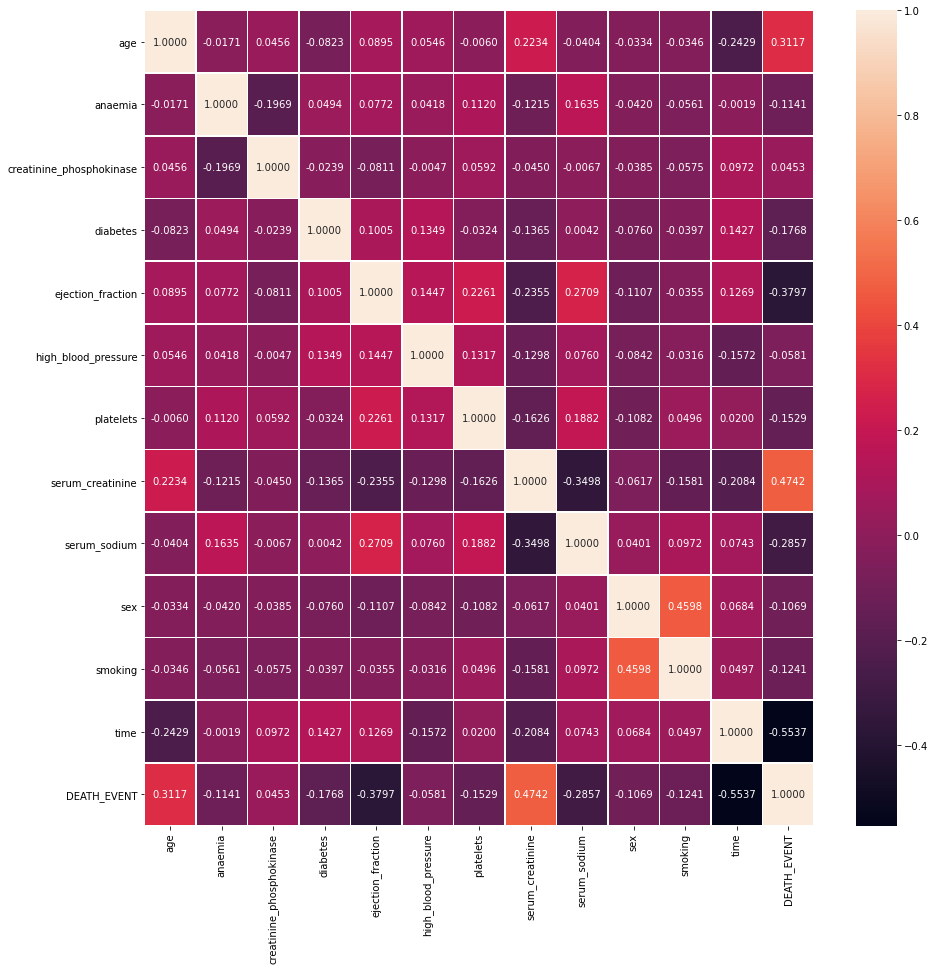

In [14]:
corr = df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot = True, fmt=".4f", linewidths=.6)

plt.show()

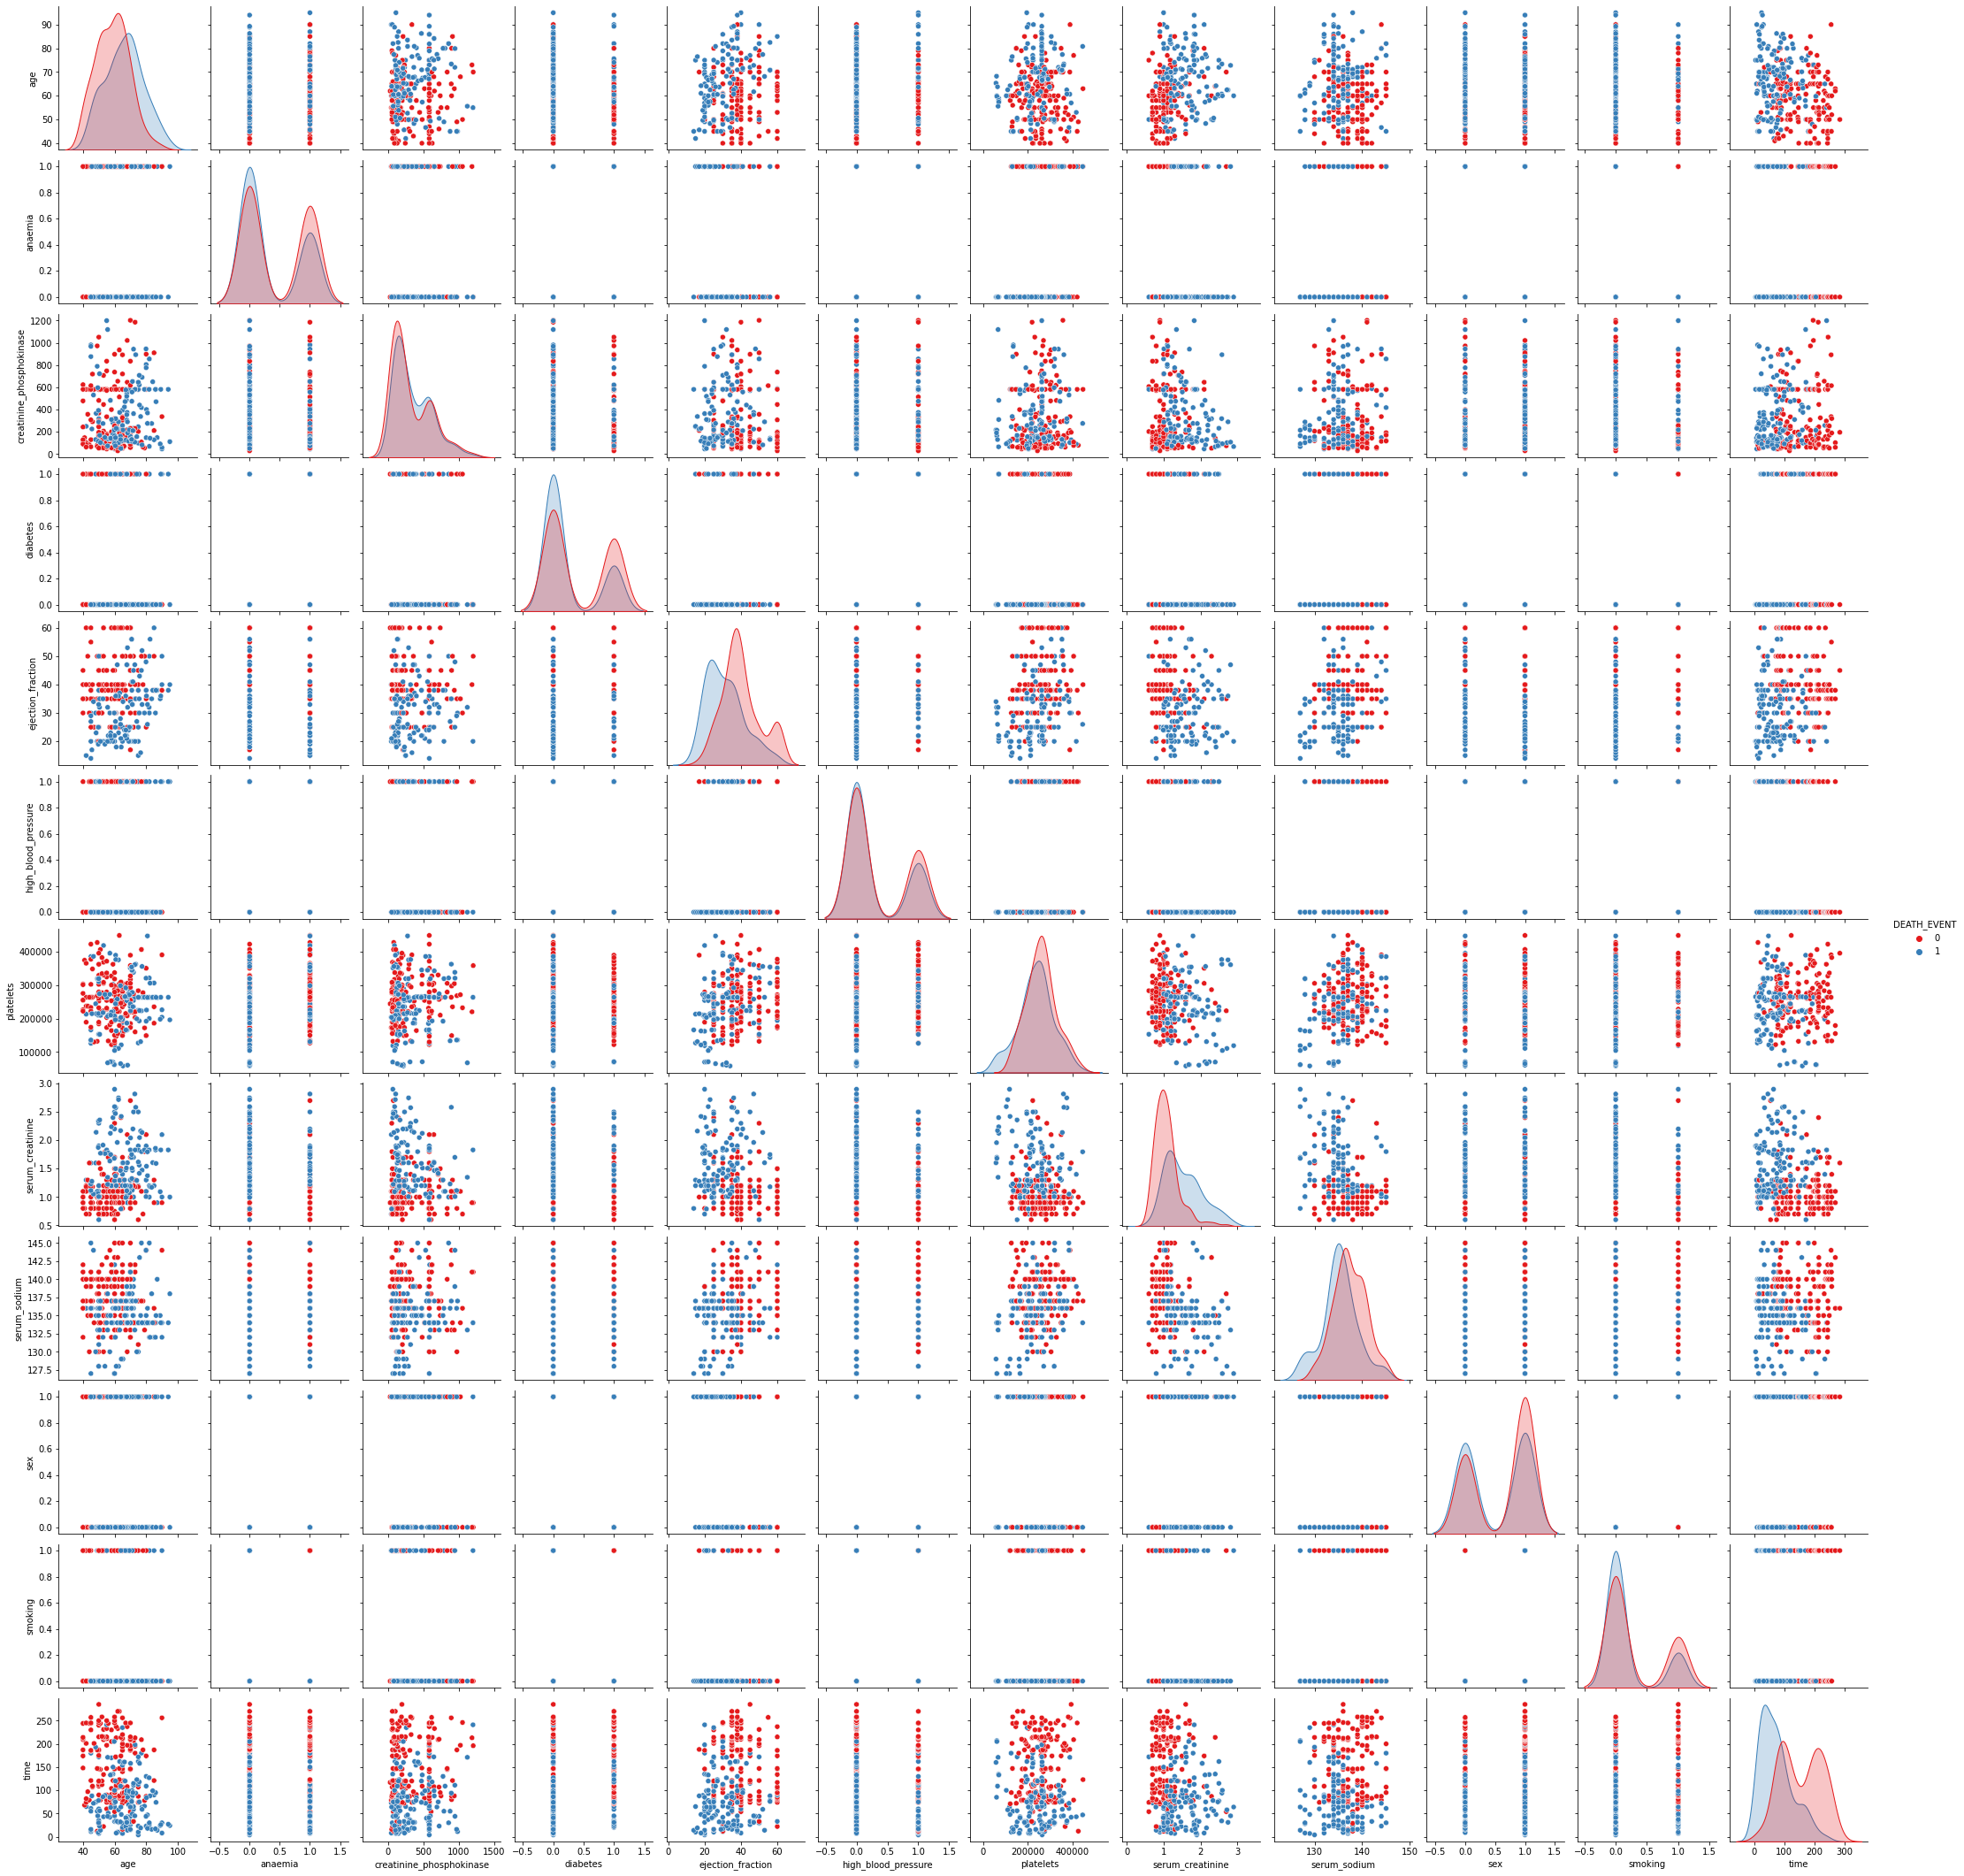

In [15]:
sns.pairplot(data=df, hue="DEATH_EVENT", palette="Set1")
plt.show()

<h2>Separando nossos dados para a criação dos modelos
   

In [16]:
X = df.drop("DEATH_EVENT",axis =1)
y = df['DEATH_EVENT']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [18]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

<h2>Criando a função para avaliar as métricas

In [19]:
def score(y_test=y_test, y_pred=None):
    acc = round(accuracy_score(y_test, y_pred), 2) * 100
    prec = round(precision_score(y_test, y_pred), 2)
    sens = round(recall_score(y_test, y_pred), 2)
    f1 = round(f1_score(y_test, y_pred), 2)
    print(f"Acurácia: {acc:.2f}%, Precisão: {prec}, Sensibilidade: {sens}, F1 Score: {f1}")
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, linewidth=0.8, linecolor="black", fmt='g')
    plt.title("Confusion Matrix")
    plt.xlabel("Predita")
    plt.ylabel("Verdadeira")
    plt.show()
    
    return acc

In [20]:
# Armazenando a acurácia dos modelos
accuracy_scores = np.zeros(5, dtype="float64")


<h2>Random Forest

Acurácia: 87.00%, Precisão: 0.84, Sensibilidade: 0.9, F1 Score: 0.87


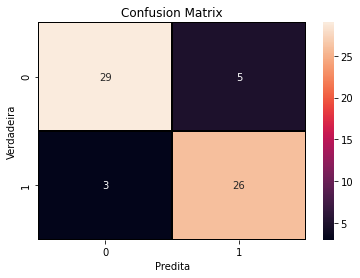

In [22]:
clf1 = RandomForestClassifier(n_estimators=1000, random_state=10,criterion = "gini").fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
accuracy_scores[0] = score(y_pred=y_pred1)

<h2>Decision Tree

Acurácia: 81.00%, Precisão: 0.77, Sensibilidade: 0.83, F1 Score: 0.8


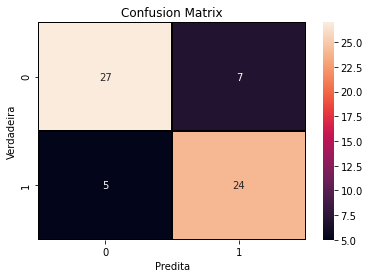

In [91]:
clf2 = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=6, random_state=10).fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
accuracy_scores[1] = score(y_pred=y_pred2)

<h3>SVM

Acurácia: 92.00%, Precisão: 0.96, Sensibilidade: 0.86, F1 Score: 0.91


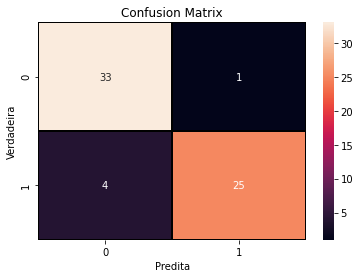

In [92]:
clf3 = SVC(random_state=0,probability=True).fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
accuracy_scores[2] = score(y_pred=y_pred3)

<h3>Naive Bayes

Acurácia: 83.00%, Precisão: 0.88, Sensibilidade: 0.72, F1 Score: 0.79


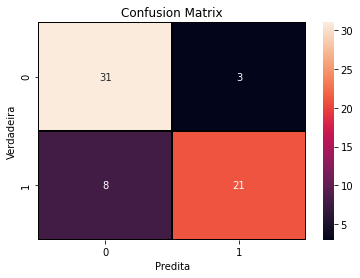

In [93]:
clf4 = GaussianNB().fit(X_train, y_train)
y_pred4 = clf4.predict(X_test)
accuracy_scores[3] = score(y_pred=y_pred4)

<h2>K — Nearest Neighbors

<h4>Escolhendo o melhor K

In [94]:
scores = []

for k in range(1, 51):
    KNN = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
k_index = scores.index(max(scores))
score_max =round( max(scores),3)
print(f"acurácia máxima em {score_max} em K = {k_index}.")

acurácia máxima em 0.905 em K = 6.


Text(0.5, 1.0, 'K Determination Using KNN')

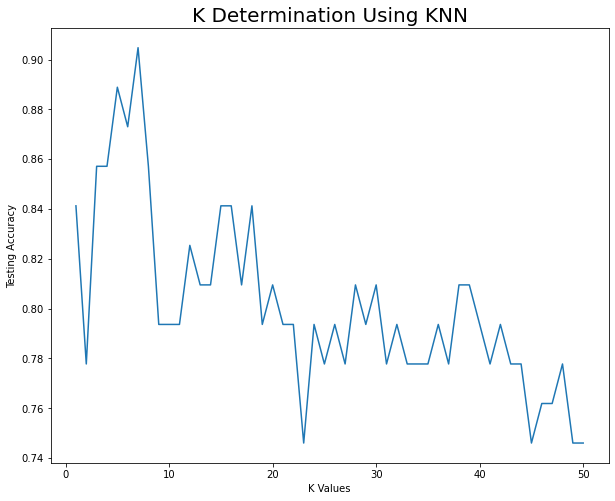

In [95]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 51), scores)
plt.xlabel('K Values')
plt.ylabel('Testing Accuracy')
plt.title('K Determination Using KNN', fontsize=20)

Acurácia: 90.00%, Precisão: 0.9, Sensibilidade: 0.9, F1 Score: 0.9


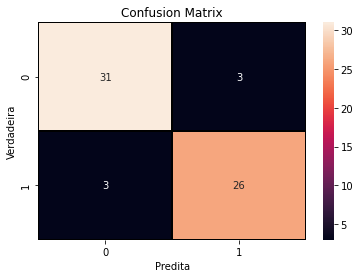

In [25]:
clf5 = KNeighborsClassifier(n_neighbors=7,metric='euclidean').fit(X_train, y_train)
y_pred5 = clf5.predict(X_test)
accuracy_scores[4] = score(y_pred=y_pred5)

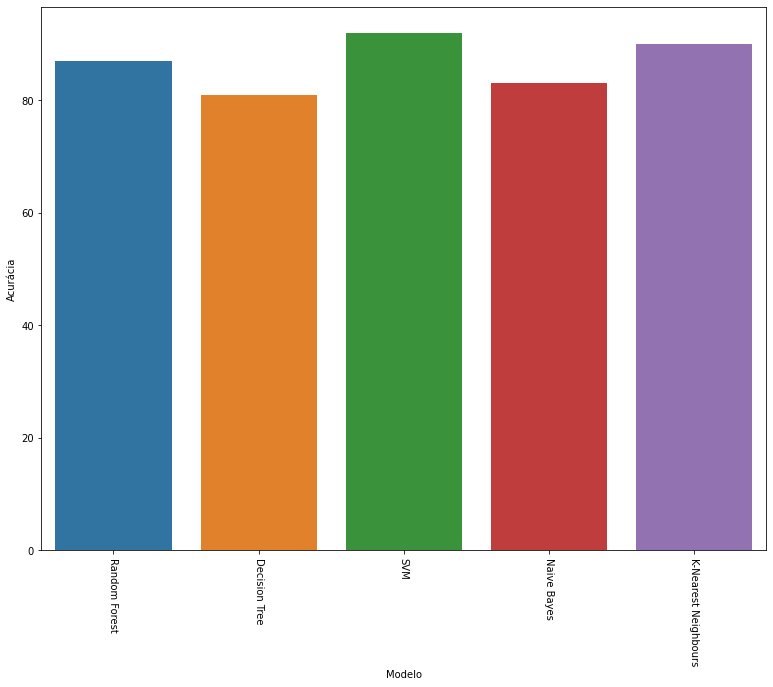

In [97]:
models = [
          "Random Forest", "Decision Tree",
          "SVM", "Naive Bayes",
          "K-Nearest Neighbours"
         ]

plt.figure(figsize=(13, 10))
sns.barplot(x=models, y=accuracy_scores)

plt.xlabel("Modelo")
plt.xticks(rotation = -90)
plt.ylabel("Acurácia")

plt.show()

In [98]:
r_probs = [0 for _ in range(len(y_test))]

clf1_probs = clf1.predict_proba(X_test)
clf2_probs = clf2.predict_proba(X_test)
clf3_probs = clf3.predict_proba(X_test)
clf4_probs = clf4.predict_proba(X_test)
clf5_probs = clf5.predict_proba(X_test)

In [99]:
clf1_probs = clf1_probs[:, 1]
clf2_probs = clf2_probs[:, 1]
clf3_probs = clf3_probs[:, 1]
clf4_probs = clf4_probs[:, 1]
clf5_probs = clf5_probs[:, 1]

In [100]:

from sklearn.metrics import roc_curve, roc_auc_score

<h2>Calculando AUC

In [104]:
r_auc = roc_auc_score(y_test, r_probs)
clf1_auc = roc_auc_score(y_test, clf1_probs)
clf2_auc = roc_auc_score(y_test, clf2_probs)
clf3_auc = roc_auc_score(y_test, clf3_probs)
clf4_auc = roc_auc_score(y_test, clf4_probs)
clf5_auc = roc_auc_score(y_test, clf5_probs)

In [105]:
print('Random Forest: AUC = %.3f' % (clf1_auc))
print('Decision Tree: AUC = %.3f' % (clf2_auc))
print('Support Vector: AUC = %.3f' % (clf3_auc))
print('Naive Bayes: AUC = %.3f' % (clf4_auc))
print('KNN: AUROC = %.3f' % (clf5_auc))

Random Forest: AUC = 0.954
Decision Tree: AUC = 0.827
Support Vector: AUC = 0.944
Naive Bayes: AUC = 0.914
KNN: AUROC = 0.941


<h2>ROC curve

In [106]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
clf1_fpr, clf1_tpr, _ = roc_curve(y_test, clf1_probs)
clf2_fpr, clf2_tpr, _ = roc_curve(y_test, clf2_probs)
clf3_fpr, clf3_tpr, _ = roc_curve(y_test, clf3_probs)
clf4_fpr, clf4_tpr, _ = roc_curve(y_test, clf4_probs)
clf5_fpr, clf5_tpr, _ = roc_curve(y_test, clf5_probs)

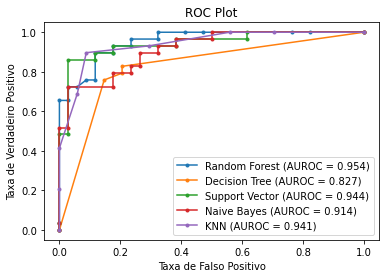

In [107]:
plt.plot(clf1_fpr, clf1_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % clf1_auc)
plt.plot(clf2_fpr, clf2_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % clf2_auc)
plt.plot(clf3_fpr, clf3_tpr, marker='.', label='Support Vector (AUROC = %0.3f)' % clf3_auc)
plt.plot(clf4_fpr, clf4_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % clf4_auc)
plt.plot(clf5_fpr, clf5_tpr, marker='.', label='KNN (AUROC = %0.3f)' % clf5_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
# Show legend
plt.legend() # 
# Show plot
plt.show()